Welcome! Do you want to:
1. Capture a photo using webcam
2. Upload a photo from your device


Enter 1 or 2:  2
Please enter the full path to your photo:  D:\\BMSCE\\Gradient\\Test data\\3.JPG


Attempting to load image from: D:\\\\BMSCE\\\\Gradient\\\\Test data\\\\3.JPG
Number of faces detected: 2


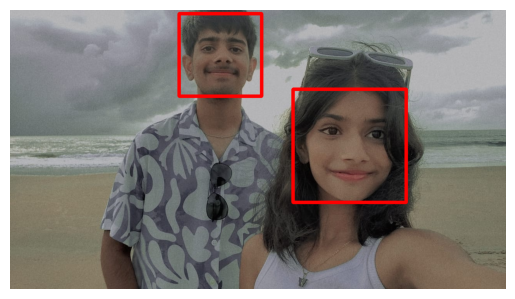

In [127]:
import cv2
from matplotlib import pyplot as plt
import os

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def capture_photo():
    try:
        cap = cv2.VideoCapture(0)
        ret, frame = cap.read()

        if not ret:
            raise Exception("Failed to capture image from webcam.")

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        gray = cv2.equalizeHist(gray)
        gray = cv2.GaussianBlur(gray, (5, 5), 0)

        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=5, minSize=(200, 200), flags=cv2.CASCADE_SCALE_IMAGE)

        print(f"Number of faces detected: {len(faces)}")

        valid_faces = [f for f in faces if f[2] > 200 and f[3] > 200]  

        for (x, y, w, h) in valid_faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 7)

        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.show()

    except cv2.error as e:
        print(f"OpenCV error occurred: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        cap.release()

def upload_photo():
    try:
        file_path = input("Please enter the full path to your photo: ")
        file_path = file_path.strip()  
        if os.name == 'nt':  
            file_path = file_path.replace('\\', '\\\\')  

        print(f"Attempting to load image from: {file_path}")
        
        if not os.path.exists(file_path):
            raise FileNotFoundError("The file path is invalid. Please try again.")

        img = cv2.imread(file_path)

        if img is None:
            raise Exception("Failed to load image. Please make sure the file is a valid image format.")

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray = cv2.equalizeHist(gray)
        gray = cv2.GaussianBlur(gray, (5, 5), 0)

        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=5, minSize=(200, 200), flags=cv2.CASCADE_SCALE_IMAGE)

        print(f"Number of faces detected: {len(faces)}")

        valid_faces = [f for f in faces if f[2] > 200 and f[3] > 200]  

        for (x, y, w, h) in valid_faces:
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 7)

        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.show()

    except cv2.error as e:
        print(f"OpenCV error occurred: {e}")
    except FileNotFoundError as e:
        print(f"File error: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")

def main():
    try:
        print("Welcome! Do you want to:")
        print("1. Capture a photo using webcam")
        print("2. Upload a photo from your device")
        
        choice = input("Enter 1 or 2: ")

        if choice == "1":
            capture_photo()
        elif choice == "2":
            upload_photo()
        else:
            raise ValueError("Invalid choice. Please choose 1 or 2.")
    
    except ValueError as e:
        print(f"Input error: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

if __name__ == "__main__":
    main()


In [ ]:
D:\\BMSCE\\Gradient\\Test data\\3.JPG